In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [16]:
data = pd.read_csv('kidney_disease_dataset.csv')

data.head()


,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


In [17]:
data.tail()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
20533,86,113,1.008,5,3,normal,abnormal,not present,not present,473,...,no,38.2,low,25,1,2.77,normal,2.45,9.31,No_Disease
20534,47,80,1.016,3,4,normal,abnormal,not present,not present,477,...,no,26.8,moderate,3,7,1.81,normal,4.19,3.45,No_Disease
20535,89,178,1.011,3,5,abnormal,abnormal,not present,not present,141,...,yes,30.0,low,6,25,1.32,abnormal,5.32,8.39,No_Disease
20536,86,138,1.009,1,5,abnormal,normal,not present,present,110,...,yes,28.9,low,0,21,2.52,abnormal,0.61,9.53,No_Disease
20537,63,120,1.015,4,5,abnormal,abnormal,present,not present,256,...,no,36.7,moderate,3,28,1.03,normal,7.00,2.36,No_Disease


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  object 
 6   Pus cells in urine                           20538 non-null  object 
 7   Pus cell clumps in urine                     20538 non-null  object 
 8   Bacteria in urine                            20538 non-null  object 
 9   Random blood glucose level (mg/dl)           20538 non-null  int64  
 10

In [19]:
data.describe


<bound method NDFrame.describe of        Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                      54                     167                      1.023   
1                      42                     127                      1.023   
2                      38                     148                      1.016   
3                       7                      98                      1.017   
4                      67                     174                      1.015   
...                   ...                     ...                        ...   
20533                  86                     113                      1.008   
20534                  47                      80                      1.016   
20535                  89                     178                      1.011   
20536                  86                     138                      1.009   
20537                  63                     120                      1.015   

     

In [23]:
data.isnull().sum()

Age of the patient                             0
Blood pressure (mm/Hg)                         0
Specific gravity of urine                      0
Albumin in urine                               0
Sugar in urine                                 0
Red blood cells in urine                       0
Pus cells in urine                             0
Pus cell clumps in urine                       0
Bacteria in urine                              0
Random blood glucose level (mg/dl)             0
Blood urea (mg/dl)                             0
Serum creatinine (mg/dl)                       0
Sodium level (mEq/L)                           0
Potassium level (mEq/L)                        0
Hemoglobin level (gms)                         0
Packed cell volume (%)                         0
White blood cell count (cells/cumm)            0
Red blood cell count (millions/cumm)           0
Hypertension (yes/no)                          0
Diabetes mellitus (yes/no)                     0
Coronary artery dise

In [36]:
# Checks
data.duplicated().sum()

0

In [38]:
data.shape

(20538, 43)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Serum creatinine (mg/dl)', ylabel='Count'>

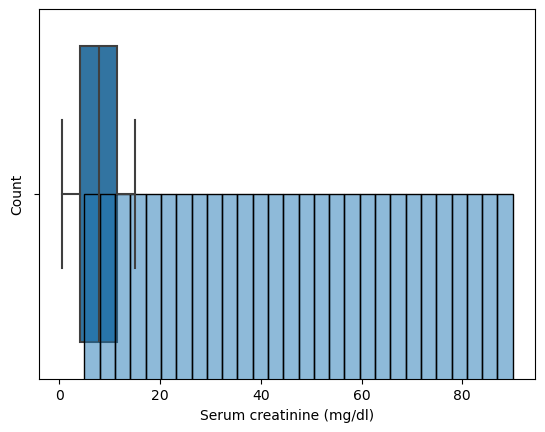

In [40]:
sns.histplot(data['Age of the patient'], kde=True)
sns.boxplot(x=data['Serum creatinine (mg/dl)'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


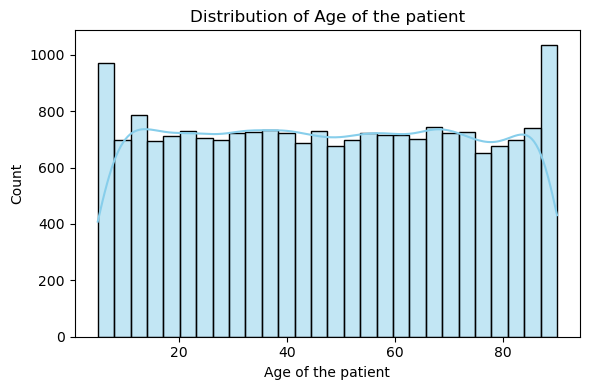

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


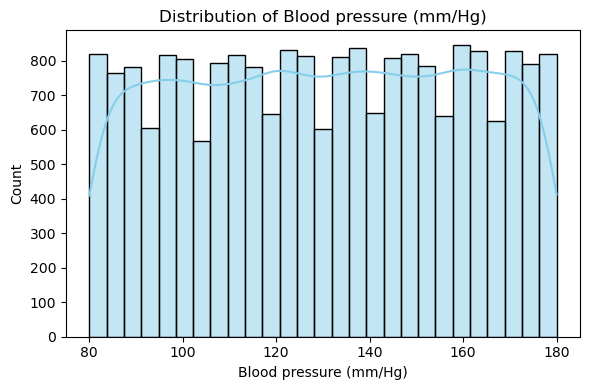

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


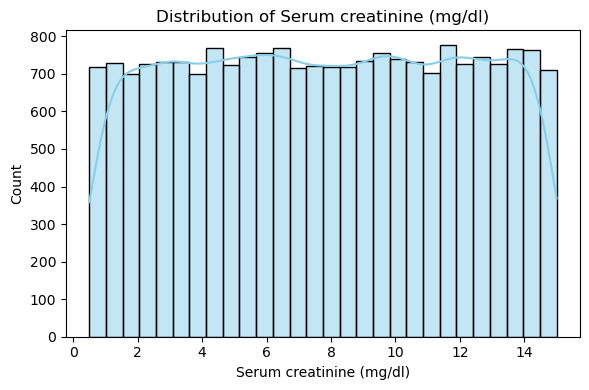

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


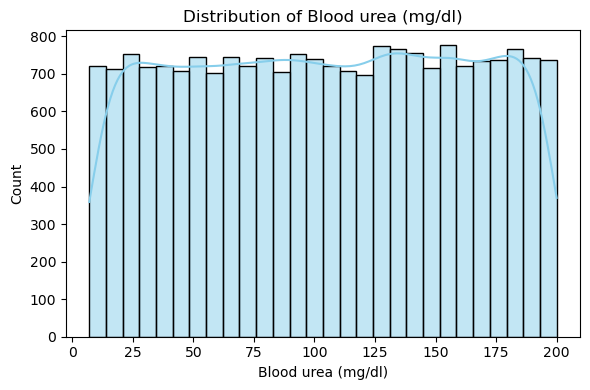

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


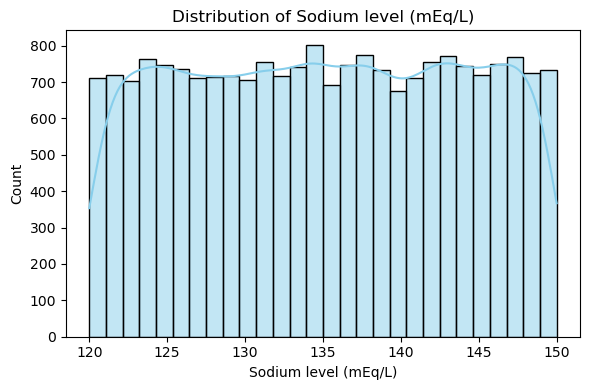

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


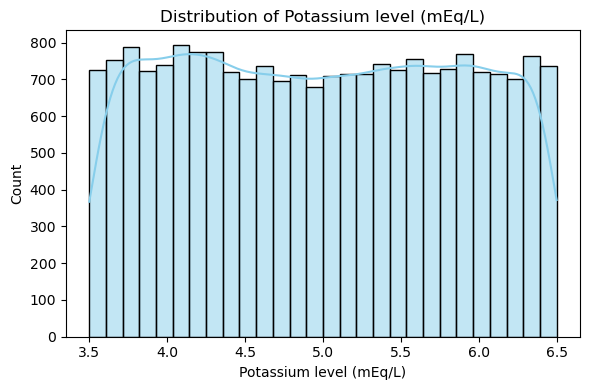

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


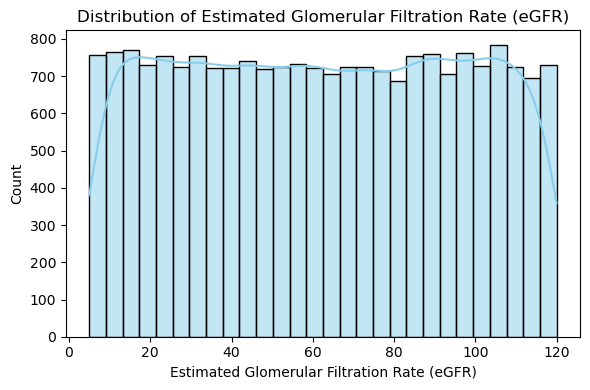

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


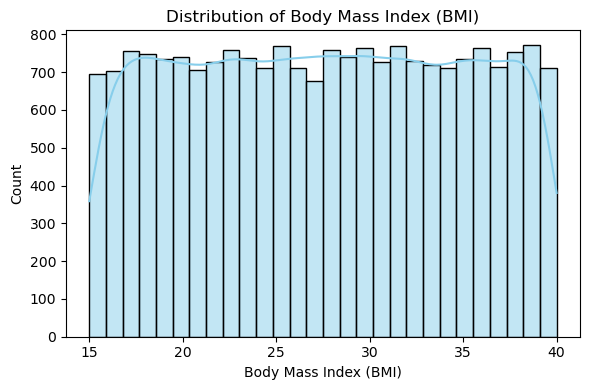

In [46]:
num_cols = [
    'Age of the patient', 'Blood pressure (mm/Hg)', 'Serum creatinine (mg/dl)', 
    'Blood urea (mg/dl)', 'Sodium level (mEq/L)', 'Potassium level (mEq/L)',
    'Estimated Glomerular Filtration Rate (eGFR)', 'Body Mass Index (BMI)'
]

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col].dropna(), kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


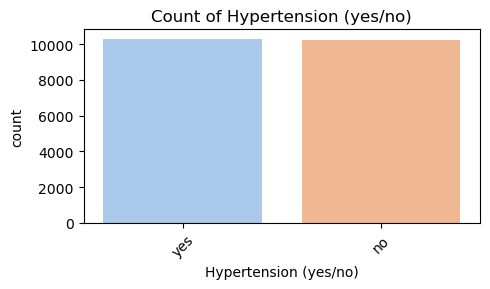

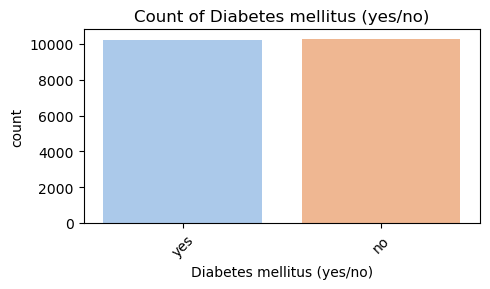

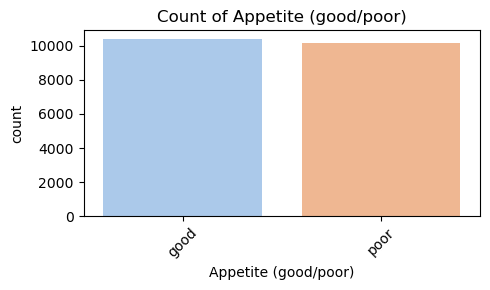

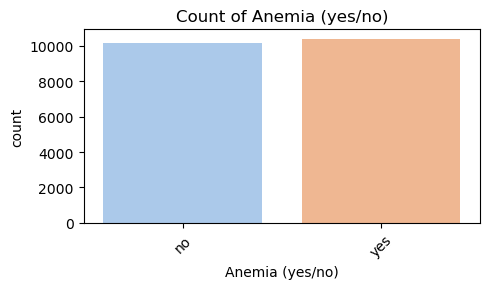

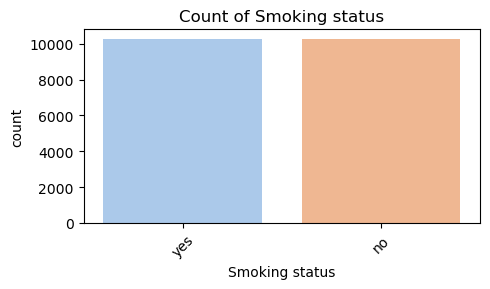

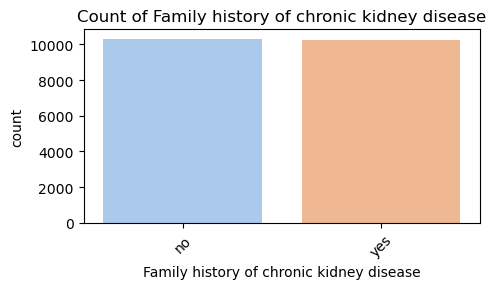

In [53]:
cat_cols = [
    'Hypertension (yes/no)', 'Diabetes mellitus (yes/no)', 'Appetite (good/poor)',
    'Anemia (yes/no)', 'Smoking status', 'Family history of chronic kidney disease'
]

for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=data, palette='pastel')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

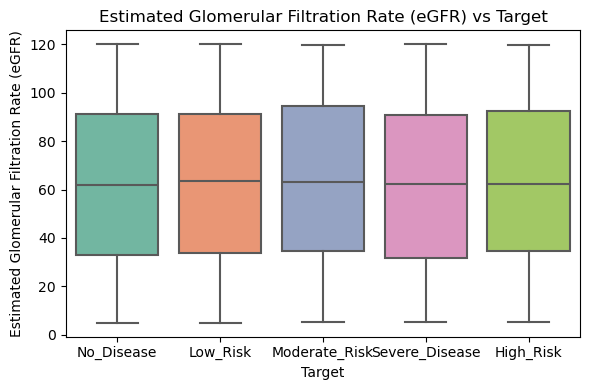

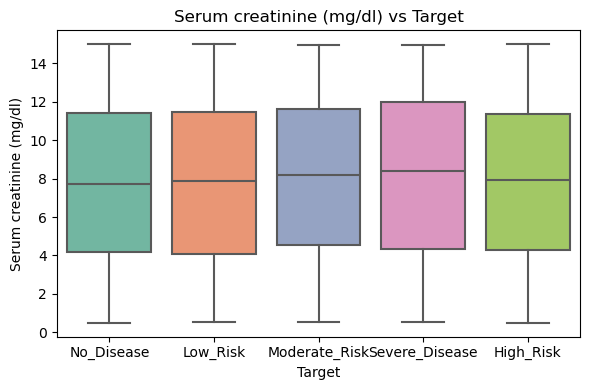

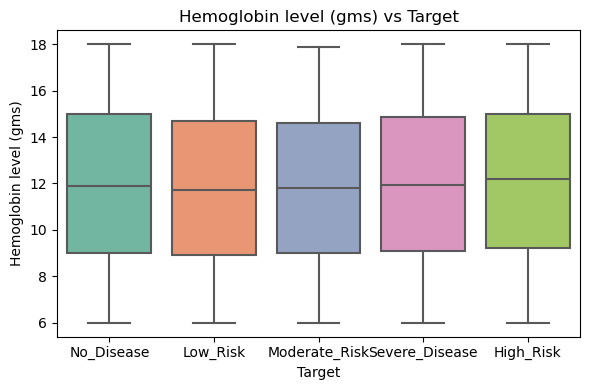

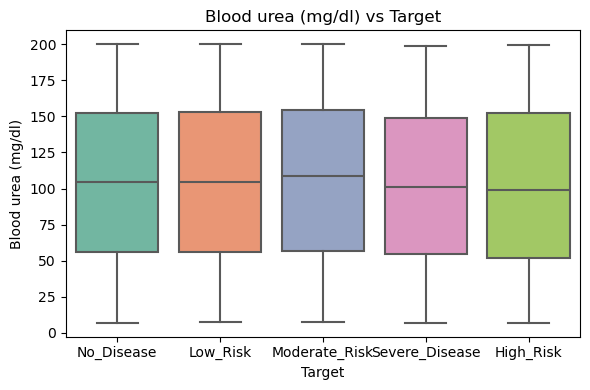

In [55]:
target = 'Target' #setting the target

important_feat = [
    'Estimated Glomerular Filtration Rate (eGFR)',
    'Serum creatinine (mg/dl)',
    'Hemoglobin level (gms)',
    'Blood urea (mg/dl)'
]

for col in important_feat:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target, y=col, data=data, palette='Set2')
    plt.title(f'{col} vs {target}')
    plt.tight_layout()
    plt.show()

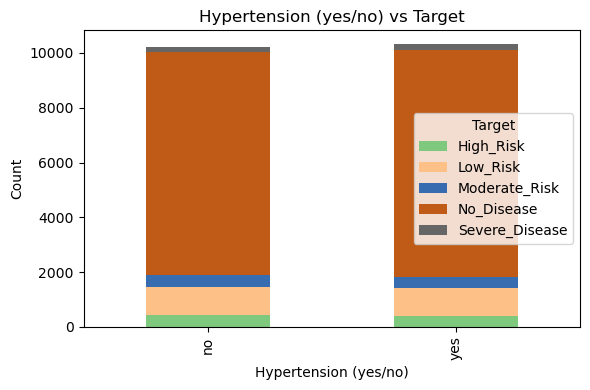

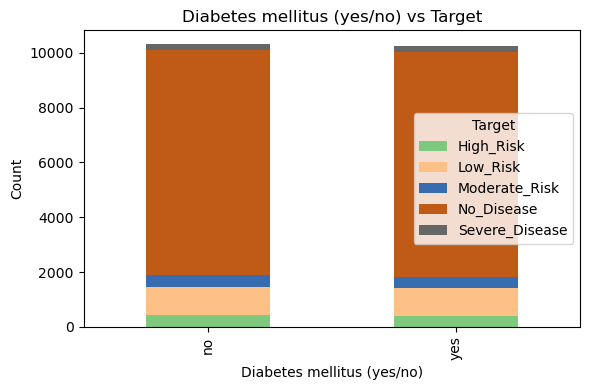

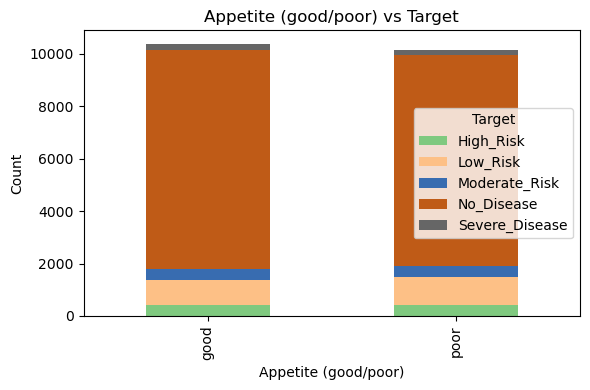

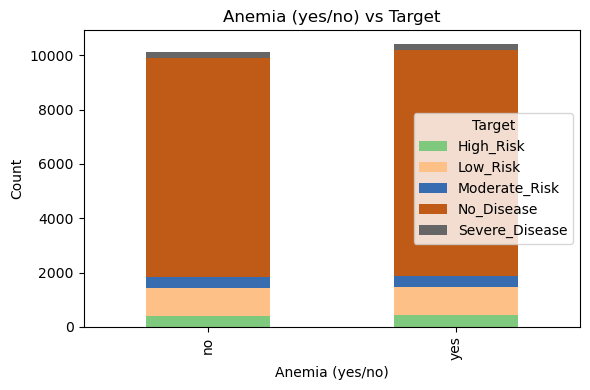

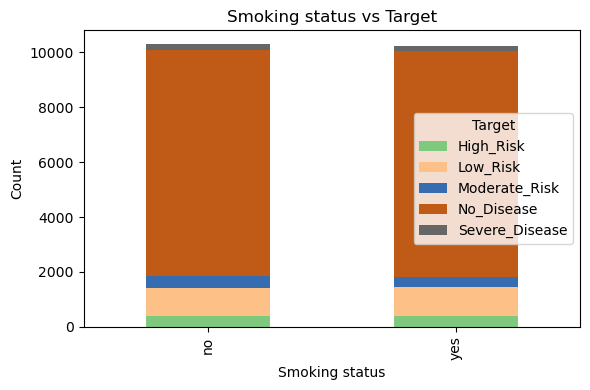

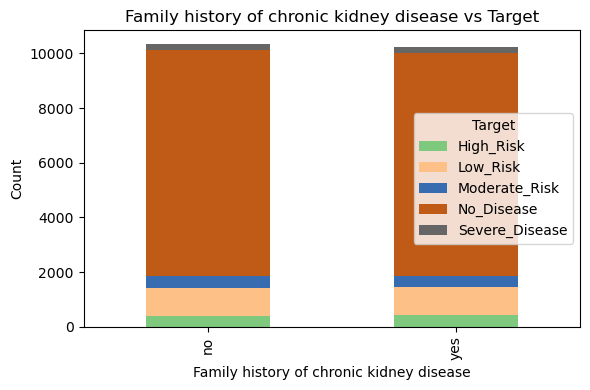

In [57]:
for col in cat_cols:
    pd.crosstab(data[col], data[target]).plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Accent')
    plt.title(f'{col} vs {target}')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [69]:
data.dtypes

Age of the patient                               int64
Blood pressure (mm/Hg)                           int64
Specific gravity of urine                      float64
Albumin in urine                                 int64
Sugar in urine                                   int64
Red blood cells in urine                        object
Pus cells in urine                              object
Pus cell clumps in urine                        object
Bacteria in urine                               object
Random blood glucose level (mg/dl)               int64
Blood urea (mg/dl)                             float64
Serum creatinine (mg/dl)                       float64
Sodium level (mEq/L)                           float64
Potassium level (mEq/L)                        float64
Hemoglobin level (gms)                         float64
Packed cell volume (%)                           int64
White blood cell count (cells/cumm)              int64
Red blood cell count (millions/cumm)           float64
Hypertensi

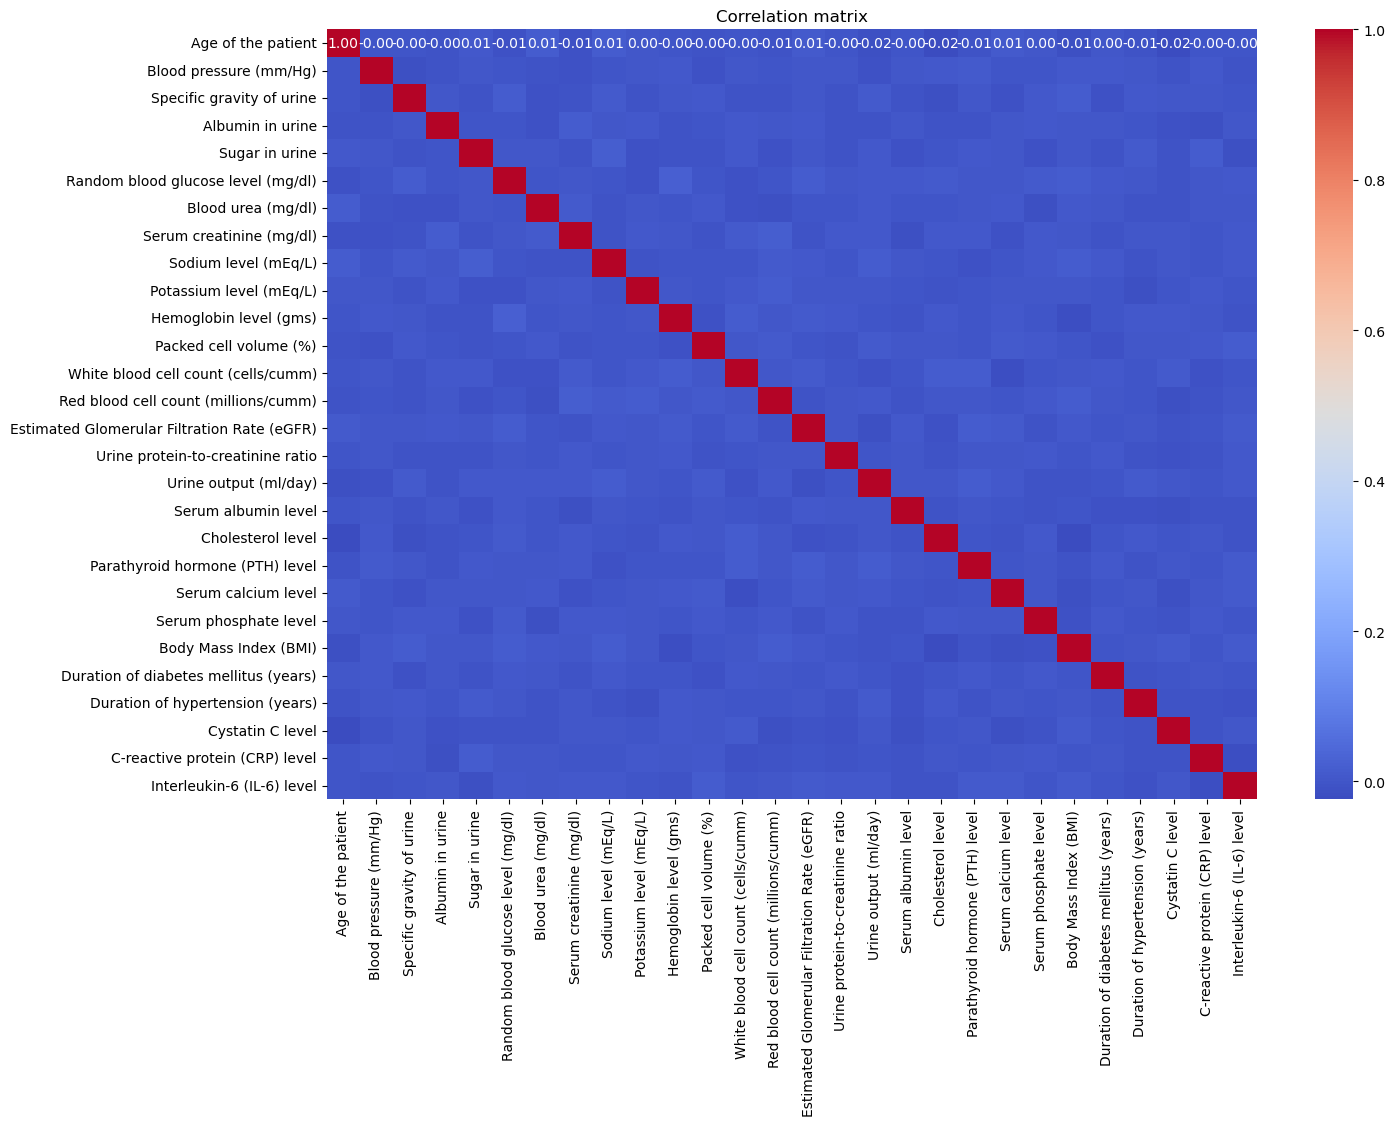

                           Age of the patient  Blood pressure (mm/Hg)  \
Age of the patient                   1.000000               -0.001952   
Blood pressure (mm/Hg)              -0.001952                1.000000   
Specific gravity of urine           -0.002532               -0.014750   
Albumin in urine                    -0.004592               -0.005509   
Sugar in urine                       0.005505                0.002809   

                           Specific gravity of urine  Albumin in urine  \
Age of the patient                         -0.002532         -0.004592   
Blood pressure (mm/Hg)                     -0.014750         -0.005509   
Specific gravity of urine                   1.000000          0.003638   
Albumin in urine                            0.003638          1.000000   
Sugar in urine                             -0.004665         -0.000369   

                           Sugar in urine  Random blood glucose level (mg/dl)  \
Age of the patient               0.

In [65]:
plt.figure(figsize=(15,10))
corr = data.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True,cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

# Show top 5 highest correlations with the target
print(corr.head(5))
print(corr.tail(10))

# Split features and target
X = data.drop('Target', axis=1)
y = data['Target']

# Encode categorical variables
X = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtypes == 'object' else col)
y = LabelEncoder().fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [72]:

# Check unique values in the original target column
og_targets = data['Target'].unique()

# Create a mapping from original labels to numeric codes (0 to 3)
target_mapping = {label: idx for idx, label in enumerate(sorted(og_targets))}

# Apply the mapping to the target column
data['Target_Encoded'] = data['Target'].map(target_mapping)

# Show the mapping and a preview of the new column
target_mapping, data[['Target', 'Target_Encoded']].head()


({'High_Risk': 0,
  'Low_Risk': 1,
  'Moderate_Risk': 2,
  'No_Disease': 3,
  'Severe_Disease': 4},
        Target  Target_Encoded
 0  No_Disease               3
 1    Low_Risk               1
 2  No_Disease               3
 3  No_Disease               3
 4  No_Disease               3)

In [99]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Pus cell clumps in urine' to numeric values using LabelEncoder
encoder = LabelEncoder()
data['Pus cell clumps in urine (encoded)'] = encoder.fit_transform(data['Pus cell clumps in urine'].astype(str))

# Optionally, convert the encoded column to float
data['Pus cell clumps in urine (encoded)'] = data['Pus cell clumps in urine (encoded)'].astype(float)

# Preview the updated column
print(data[['Pus cell clumps in urine', 'Pus cell clumps in urine (encoded)']].head())


  Pus cell clumps in urine  Pus cell clumps in urine (encoded)
0              not present                                 0.0
1              not present                                 0.0
2              not present                                 0.0
3              not present                                 0.0
4              not present                                 0.0


In [100]:
data.head(40)

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target,Target_Encoded,Pus cell clumps in urine (encoded)
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,low,4,16,0.67,normal,4.88,10.23,No_Disease,3,0.0
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk,1,0.0
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,high,11,23,2.37,abnormal,4.57,13.27,No_Disease,3,0.0
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,high,24,3,2.54,abnormal,8.57,12.36,No_Disease,3,0.0
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,high,22,24,1.90,normal,6.75,1.46,No_Disease,3,0.0
5,14,92,1.006,4,2,abnormal,abnormal,not present,present,371,...,moderate,26,12,2.81,normal,2.33,2.98,No_Disease,3,0.0
6,9,156,1.010,2,0,abnormal,normal,not present,not present,255,...,moderate,5,14,1.90,abnormal,7.31,7.00,No_Disease,3,0.0
7,67,100,1.010,5,3,normal,normal,present,present,260,...,moderate,15,1,0.86,abnormal,7.86,12.95,No_Disease,3,1.0
8,42,138,1.017,4,4,abnormal,normal,present,present,352,...,moderate,18,5,2.24,abnormal,5.93,10.13,No_Disease,3,1.0
9,23,127,1.020,2,4,abnormal,abnormal,not present,present,196,...,low,23,30,1.42,abnormal,3.82,6.87,No_Disease,3,0.0


In [101]:
# Filter rows where Target_Encoded is 0 or 4
filtered_df = data[data['Target_Encoded'].isin([0, 4])]

# Display the result
print(filtered_df)

       Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
62                     89                     128                      1.021   
64                     26                     126                      1.010   
66                     71                      92                      1.007   
89                     59                     158                      1.007   
100                    32                     136                      1.008   
...                   ...                     ...                        ...   
20440                  86                      80                      1.006   
20444                  55                     118                      1.013   
20480                  55                     101                      1.008   
20485                  38                     157                      1.015   
20518                  47                     173                      1.018   

       Albumin in urine  Sugar in urine

In [76]:
# Split features and target
X = data.drop('Target_Encoded', axis=1)
y = data['Target_Encoded']

# Encode categorical variables
X = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtypes == 'object' else col)
y = LabelEncoder().fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       416
           2       1.00      1.00      1.00       155
           3       1.00      1.00      1.00      3296
           4       1.00      1.00      1.00        73

    accuracy                           1.00      4108
   macro avg       1.00      1.00      1.00      4108
weighted avg       1.00      1.00      1.00      4108



In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [105]:
features = [
    'Age of the patient', 'Blood pressure (mm/Hg)', 'Serum creatinine (mg/dl)',
    'Blood urea (mg/dl)', 'Sodium level (mEq/L)', 'Potassium level (mEq/L)',
    'Hemoglobin level (gms)', 'Estimated Glomerular Filtration Rate (eGFR)', 
    'Body Mass Index (BMI)', 'Pus cell clumps in urine (encoded)'
]

target = 'Target_Encoded'

In [106]:
data_model = data[features + [target]].dropna()

# Encode target
le = LabelEncoder()
data_model[target] = le.fit_transform(data_model[target])

In [107]:
X = data_model[features]
y = data_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    print(f'{name} Accuracy: {acc:.2f}%')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 80.23%
Random Forest Accuracy: 80.23%
SVM Accuracy: 80.23%
Naive Bayes Accuracy: 80.23%


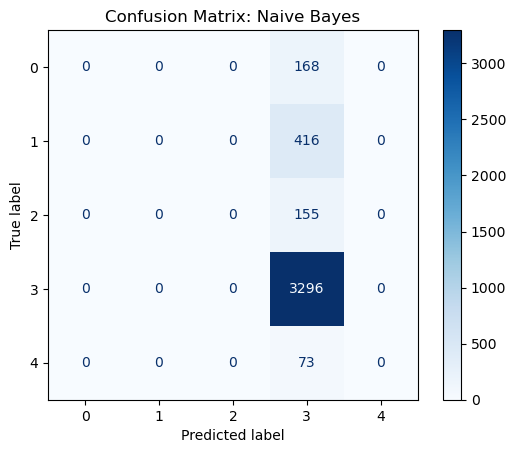

In [109]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix: {name}')
plt.show()